## Canasta básica México, 2023 
### Sergio  Alberto de León Martínez 
#### Reconocimiento Estadístico de Patrones 


### *Introducción*

La calidad de vida de las personas está intrínsecamente ligada a factores esenciales como la alimentación y el acceso a productos de primera necesidad. Por ello, es crucial definir un grupo de productos que satisfagan los requisitos mínimos de nutrición, salud e higiene. A este grupo se le denomina canasta básica. En México, la determinación de los productos que componen la canasta básica considera varios factores, tales como el salario mínimo, el número promedio de personas por hogar y las recomendaciones de ingesta calórica y nutricional. La composición más reciente de la canasta básica se puede consultar en la página oficial del gobierno. Además, es responsabilidad del gobierno mexicano garantizar el acceso a estos productos a través de las tiendas comunitarias de SEGALMEX, ubicadas en localidades con niveles de marginación alta o muy alta y que cuentan con poblaciones que van desde 200 hasta 14,999 habitantes.

Este trabajo se enfocará en responder a las siguientes preguntas sobre el comportamiento general de la canasta básica a lo largo del país:

- ¿Es posible distinguir regiones con precios similares de la canasta básica? En caso afirmativo, ¿cuáles son estas regiones?

- ¿Qué productos influyen en la tendencia del precio promedio de la canasta básica a nivel nacional?

- ¿Existen grupos de productos que presenten comportamientos de precio similares?

Para responder a estas preguntas, nos restringiremos al año 2023 y se considerara la siguiente lista de productos según la SEGALMEX:

<table>
<tr>
<td>

- Aceites y grasas vegetales comestibles
- Agua embotellada
- Aguacate
- Arroz
- Atún y sardina en lata
- Azúcar
- Café soluble
- Carne de cerdo
- Carne de res
- Cebolla
- Cereales en hojuelas
- Chiles envasados
- Chocolate y productos de confitería
- Crema y productos para higiene dental
- Frijol
- Galletas

</td>
<td>

- Harinas de trigo
- Huevo
- Jabón de tocador
- Jitomate
- Leche en polvo
- Leche pasteurizada y fresca
- Limón
- Manzana
- Otras legumbres secas
- Pan de caja
- Papa y otros tubérculos
- Papel higiénico y pañuelos desechables
- Pasta para sopa
- Pollo
- Tortilla de maíz
- Tostadas

</td>
</tr>
</table>


[1]: Ver más en [canasta básica, México](https://www.gob.mx/siap/es/articulos/canasta-basica-alimentaria?idiom=es/). 

[2]: Ver mas en [Canasta básica actualizada](https://www.gob.mx/canastabasica)

[3]: Ver más en [Infobae](https://www.infobae.com/mexico/2024/03/12/marzo-del-2024-este-es-el-precio-de-la-canasta-basica-en-mexico/)


Primero importemos las librerias y el software especializado que se va a utilizar. 

In [2]:
# Tools
import pandas as pd 
import numpy as np

# Clustering and dimensional reduction
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from minisom import MiniSom

# Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

## Exploración de los datos 

Los datos que utilizamos fueron extraídos de la página oficial del [INEGI](https://www.inegi.org.mx/app/preciospromedio/?bs=18), para cada producto podemos encontrar la ciudad de referencia, el mes, y el precio promedio mensual por unidad (Kg, Lts, étc) para diferentes marcas o proveedores. Tenemos un total de 32 productos y 55 ciudades distribuidas a lo largo de todo el país. 

In [3]:
# Read and clean data 
df = pd.read_csv('./canasta_basica_23.CSV', encoding='ISO-8859-1', skiprows=4)
df = df[['Año', 'Mes', 'Clave ciudad', 'Nombre ciudad', 'Clave genérico', 'Genérico', 'Especificación', 'Precio promedio', 'Cantidad', 'Unidad']]
products = sorted(list(set(df['Genérico'])))
years = sorted(list(set(df['Año'])))
print(f"Cantidad de productos: {len(products)}", products)
print(df.shape)
df.head()

Cantidad de productos: 32 ['Aceites y grasas vegetales comestibles', 'Agua embotellada', 'Aguacate', 'Arroz', 'Atún y sardina en lata', 'Azúcar', 'Café soluble', 'Carne de cerdo', 'Carne de res', 'Cebolla', 'Cereales en hojuelas', 'Chiles envasados', 'Chocolate y productos de confitería', 'Crema y productos para higiene dental', 'Frijol', 'Galletas', 'Harinas de trigo', 'Huevo', 'Jabón de tocador', 'Jitomate', 'Leche en polvo', 'Leche pasteurizada y fresca', 'Limón', 'Manzana', 'Otras legumbres secas', 'Pan de caja', 'Papa y otros tubérculos', 'Papel higiénico y pañuelos desechables', 'Pasta para sopa', 'Pollo', 'Tortilla de maíz', 'Tostadas']
(196776, 10)


,Año,Mes,Clave ciudad,Nombre ciudad,Clave genérico,Genérico,Especificación,Precio promedio,Cantidad,Unidad
0,2023,12,1,Área Met. de la Cd. de México,1,Arroz,"VERDE VALLE, BLANCO, SUPER EXTRA, BOLSA DE 900...",44.44,1,KG
1,2023,12,1,Área Met. de la Cd. de México,1,Arroz,"VERDE VALLE, BLANCO, SUPER EXTRA, BOLSA DE 1 K...",39.50,1,KG
2,2023,12,1,Área Met. de la Cd. de México,1,Arroz,"SOS, BLANCO, EXTRA, BOLSA DE 1 KG ...",29.00,1,KG
3,2023,12,1,Área Met. de la Cd. de México,1,Arroz,"MP, BLANCO, SUPER EXTRA, BOLSA DE 900 GR ...",19.44,1,KG
4,2023,12,1,Área Met. de la Cd. de México,1,Arroz,"VERDE VALLE, BLANCO, SUPER EXTRA, BOLSA DE 900...",35.00,1,KG


In [4]:
cities = sorted(list(set(df['Nombre ciudad'])))
print(f"Cantidad de ciudades {len(cities)}:", cities)

Cantidad de ciudades 55: ['Acapulco, Gro.', 'Aguascalientes, Ags.', 'Atlacomulco, Edo. de Méx.', 'Campeche, Camp.', 'Cancún, Q. Roo.', 'Cd. Acuña, Coah.', 'Cd. Juárez, Chih.', 'Chetumal, Q. Roo.', 'Chihuahua, Chih.', 'Coatzacoalcos, Ver.', 'Colima, Col.', 'Cortazar, Gto.', 'Cuernavaca, Mor.', 'Culiacán, Sin.', 'Córdoba, Ver.', 'Durango, Dgo.', 'Esperanza, Son.', 'Fresnillo, Zac.', 'Guadalajara, Jal.', 'Hermosillo, Son.', 'Huatabampo, Son.', 'Iguala, Gro.', 'Izúcar de Matamoros, Pue.', 'Jacona, Mich.', 'Jiménez, Chih.', 'La Paz, B.C.S.', 'León, Gto.', 'Matamoros, Tamps.', 'Mexicali, B.C.', 'Monclova, Coah.', 'Monterrey, N.L.', 'Morelia, Mich.', 'Mérida, Yuc.', 'Oaxaca, Oax.', 'Pachuca, Hgo.', 'Puebla, Pue.', 'Querétaro, Qro.', 'Saltillo, Coah.', 'San Andrés Tuxtla, Ver.', 'San Luis Potosí, S.L.P.', 'Tampico, Tamps.', 'Tapachula, Chis.', 'Tehuantepec, Oax.', 'Tepatitlán, Jal.', 'Tepic, Nay.', 'Tijuana, B.C.', 'Tlaxcala, Tlax.', 'Toluca, Edo. de Méx.', 'Torreón, Coah.', 'Tulancingo, Hgo.'

### Comparación de precios a lo largo del año 2023

Primero veamos el precio promedio de diferentes productos a lo largo del año. En general se puede apreciar un aumento de los precios, pero en algunos alimentos como el frijol se puede apreciar una clara tendencia estacional. 

In [113]:
# Create figure 
fig = go.Figure()

# Set the colors for the lines
colors = [
    '#17becf', '#e377c2', '#ff7f0e', '#2ca02c', 'darkblue', 'firebrick', 
    '#bcbd22', '#d62728', '#9467bd', '#8c564b', '#e7ba52', '#7f7f7f',
    '#f7b6d2', '#c7c7c7', '#bcbd22', '#dbdb8d', '#9edae5', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#ad494a', '#d6616b',
    '#7b4173', '#a55194', '#ce6dbd', '#de9ed6', '#3182bd', '#6baed6',
    '#9ecae1', '#c6dbef'
]

# Create x-axis labels for the months
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Selected products 
selected_products = ['Aguacate', 'Arroz', 'Cebolla',  
                     'Frijol', 'Harinas de trigo', 'Huevo', 'Jitomate', 'Leche pasteurizada y fresca', 
                     'Limón', 'Manzana', 'Otras legumbres secas', 'Papa y otros tubérculos', 
                     'Pasta para sopa', 'Pollo', 'Tortilla de maíz']

# Add trace, one per product 
for i, product in enumerate(selected_products):
    df_product = df[df['Genérico'] == product]
    precio_promedio = df_product.groupby('Mes')['Precio promedio'].mean()
    fig.add_trace(go.Scatter(x=months, y=precio_promedio,  line=dict(color=colors[i], width=4), name=str(product)))

# Compute food basket's average 
prices_avg_years = df[df['Genérico'].isin(selected_products)].groupby(['Mes'])['Precio promedio'].mean()
fig.add_trace(go.Scatter(x=months, y=prices_avg_years, mode='lines', name='Promedio canasta básica', line=dict(dash='dash', color='black')))

# Actualizar el diseño de la figura para que coincida con el estilo deseado
fig.update_layout(
title=f'Precio de productos de la canasta básica a lo Largo de los Meses (2023)',
    xaxis_title='Mes',
    yaxis_title='Precio',
    legend_title='Año'
)

# Mostrar la figura
fig.show()

Es importante resaltar la diversidad de precios para un mismo producto dependiendo del proveedor, tomemos como ejemplo al aguacate y al huevo, el siguiente gráfico nos indica la presencia de precios atípicos a lo largo del año para estos dos alimentos, en general parece ser que varían más los precios del aguacate. 

In [114]:
fig = go.Figure()

fig.add_trace(go.Box(
    y=df[df['Genérico'] == 'Aguacate']['Precio promedio'],
    x=df[df['Genérico'] == 'Aguacate']['Mes'],
    name='Aguacate',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=df[df['Genérico'] == 'Huevo']['Precio promedio'],
    x=df[df['Genérico'] == 'Huevo']['Mes'],
    name='Huevo',
    marker_color='#FF851B'
))

fig.update_layout(
    yaxis_title='Precios promedio',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()


### Comparación de precios por Ciudad 

También es interesante hacer una comparación por ciudades ubicadas en diferentes puntos del país para tener alguna noción de cuánto pueden variar los precios de diferentes productos. Se puede ver por ejemplo que Veracruz tiene precios más bajos en comparación con las demás ciudades que se consideran en el gráfico de abajo. 

In [115]:
# Create figure
fig = go.Figure()

# Set the colors for the lines
colors = [
    '#17becf', '#e377c2', '#ff7f0e', '#2ca02c', 'darkblue', 'firebrick', 
    '#bcbd22', '#d62728', '#9467bd', '#8c564b', '#e7ba52', '#7f7f7f',
    '#f7b6d2', '#c7c7c7', '#bcbd22', '#dbdb8d', '#9edae5', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#ad494a', '#d6616b',
    '#7b4173', '#a55194', '#ce6dbd', '#de9ed6', '#3182bd', '#6baed6',
    '#9ecae1', '#c6dbef'
]

# Create x-axis labels for the selected cities
selected_cities = sorted(['La Paz, B.C.S.', 'Área Met. de la Cd. de México', 'Mérida, Yuc.', 'San Luis Potosí, S.L.P.', 'Veracruz, Ver.',], reverse=True)
df_cities = df[df['Nombre ciudad'].isin(selected_cities)]

# Add trace one per product
for i, product in enumerate(selected_products):
    df_product = df_cities[df_cities['Genérico'] == product]
    mean_price = df_product.groupby('Nombre ciudad')['Precio promedio'].mean()
    fig.add_trace(go.Scatter(x=selected_cities, y=mean_price,  line=dict(color=colors[i], width=4), name=str(product)))

# Campute and trace the average value of products 
prices_avg = df_cities.groupby(['Nombre ciudad'])['Precio promedio'].mean()
fig.add_trace(go.Scatter(x=selected_cities, y=prices_avg, mode='lines', name='Promedio canasta básica', line=dict(dash='dash', color='black')))

# Actualizar el diseño de la figura para que coincida con el estilo deseado
fig.update_layout(
    title=f'Precio de productos de canasta básica para diferentes ciudades',
    xaxis_title='Ciudad',
    yaxis_title='Precio',
    legend_title='Producto'
)

# Mostrar la figura
fig.show()

## Clustering por Estados 

Una vez que hemos explorado los datos, utilicemos un algoritmo de clustering estándar (K-medias) para identificar regiones similares, para determinar el número de clusters para un análisis robusto, midamos que tanto se diferencian los integrantes de un grupo para diferente número de clusters y visualizemos con un gráfico. 

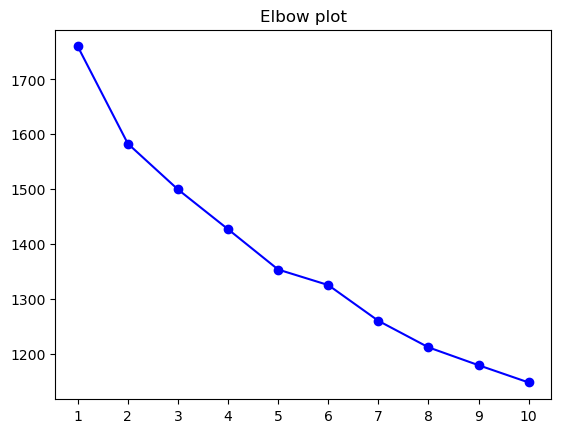

In [14]:
# Extract price data per city 
data_cities = np.array([ df[df['Nombre ciudad'] == name_city].groupby('Genérico')['Precio promedio'].mean() for name_city in cities ])

# Scale data 
scaler = StandardScaler()
data_cities_escaled = pd.DataFrame(scaler.fit_transform(data_cities))

# Elbow plot 
max_clusters = 10
inertia_collection = np.zeros(max_clusters)
x = list(range(1, max_clusters+1))
for k in range(max_clusters):
    km = KMeans(n_clusters=k+1, n_init=10)
    km.fit(data_cities_escaled)
    inertia_collection[k] = km.inertia_

plt.plot(x, inertia_collection, 'bo-')
plt.xticks(x)
plt.title('Elbow plot')
plt.show()

Un número aceptable de clusters parece ser cuatro, por lo tanto procedamos a etiquetal los datos. 

In [15]:
km = KMeans(n_clusters=4, n_init=10)
km.fit(data_cities_escaled)

labels_km = km.labels_
labels_km_dict = {name_city: label for (name_city, label) in zip(cities, labels_km)}
print(labels_km_dict)

{'Acapulco, Gro.': 1, 'Aguascalientes, Ags.': 2, 'Atlacomulco, Edo. de Méx.': 2, 'Campeche, Camp.': 1, 'Cancún, Q. Roo.': 3, 'Cd. Acuña, Coah.': 1, 'Cd. Juárez, Chih.': 2, 'Chetumal, Q. Roo.': 1, 'Chihuahua, Chih.': 2, 'Coatzacoalcos, Ver.': 1, 'Colima, Col.': 1, 'Cortazar, Gto.': 2, 'Cuernavaca, Mor.': 1, 'Culiacán, Sin.': 3, 'Córdoba, Ver.': 1, 'Durango, Dgo.': 2, 'Esperanza, Son.': 2, 'Fresnillo, Zac.': 2, 'Guadalajara, Jal.': 1, 'Hermosillo, Son.': 0, 'Huatabampo, Son.': 2, 'Iguala, Gro.': 2, 'Izúcar de Matamoros, Pue.': 1, 'Jacona, Mich.': 1, 'Jiménez, Chih.': 2, 'La Paz, B.C.S.': 3, 'León, Gto.': 2, 'Matamoros, Tamps.': 3, 'Mexicali, B.C.': 0, 'Monclova, Coah.': 1, 'Monterrey, N.L.': 3, 'Morelia, Mich.': 1, 'Mérida, Yuc.': 1, 'Oaxaca, Oax.': 2, 'Pachuca, Hgo.': 2, 'Puebla, Pue.': 2, 'Querétaro, Qro.': 1, 'Saltillo, Coah.': 2, 'San Andrés Tuxtla, Ver.': 1, 'San Luis Potosí, S.L.P.': 1, 'Tampico, Tamps.': 1, 'Tapachula, Chis.': 1, 'Tehuantepec, Oax.': 1, 'Tepatitlán, Jal.': 2, 'Tep

Una manera muy útil de visualizar que tanto se diferencian los elemnetos de un mismo clúster es el siguiente gráfico (strip plot) entre más puntos con valores grandes en el eje "y" tenga un grupo, más inhomogéneo es éste. En nuestro caso, podemos encontrar diferencias razonables considerando la variabilidad en los precios para diferentes ciudades. 

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



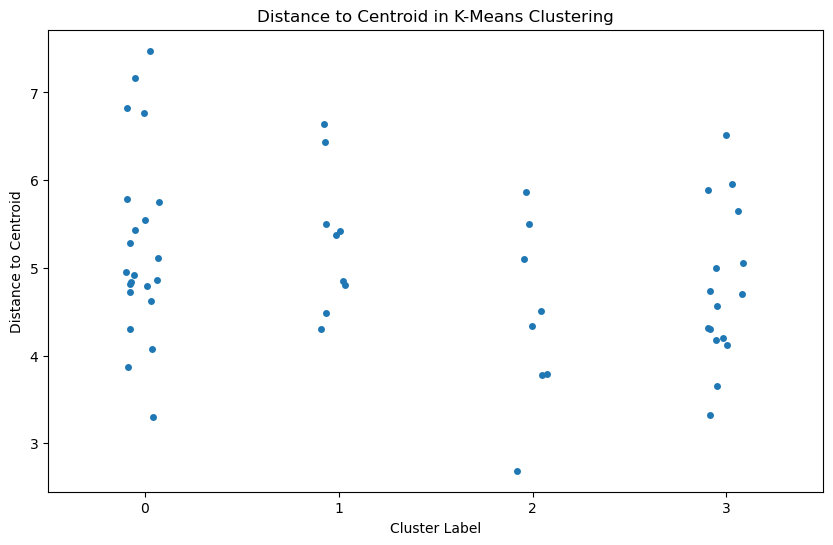

In [134]:
data_cities_escaled.replace([np.inf, -np.inf], np.nan, inplace=True)

# Extract the cluster labels and centroids
centroids = km.cluster_centers_

# Calculate distances to the centroid for each data point
distances = np.sqrt(((data_cities_escaled - centroids[labels_km]) ** 2).sum(axis=1))

# Prepare the DataFrame
df_distances = pd.DataFrame({
    'Cluster': labels_km,
    'Distance to Centroid': distances
})

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Cluster', y='Distance to Centroid', data=df_distances, jitter=True)

plt.title('Distance to Centroid in K-Means Clustering')
plt.xlabel('Cluster Label')
plt.ylabel('Distance to Centroid')
plt.show()


Agreguemos la información del etiquetado a nuestro conjunto de datos y calculemos además el precio promedio de la canasta básica para cada estado del país. 

In [16]:
data_cities = pd.DataFrame(data_cities)
data_cities.columns = products
data_cities.insert(loc=0, column='Nombre ciudad', value=cities)
data_cities.insert(loc=0, column='Label', value=labels_km)
data_cities.head()

,Label,Nombre ciudad,Aceites y grasas vegetales comestibles,Agua embotellada,Aguacate,Arroz,Atún y sardina en lata,Azúcar,Café soluble,Carne de cerdo,...,Limón,Manzana,Otras legumbres secas,Pan de caja,Papa y otros tubérculos,Papel higiénico y pañuelos desechables,Pasta para sopa,Pollo,Tortilla de maíz,Tostadas
0,1,"Acapulco, Gro.",53.915667,12.056806,70.895000,24.314167,144.661833,25.743333,833.874306,110.305399,...,37.077396,58.978000,46.538750,92.696000,30.817500,45.854722,50.644667,106.762847,28.230917,94.528472
1,2,"Aguascalientes, Ags.",110.513889,9.079375,53.861944,24.438667,139.889464,30.967917,708.012500,107.605370,...,31.852619,46.555370,58.818214,88.337083,29.970333,76.881212,47.368526,67.987531,22.607870,113.301548
2,2,"Atlacomulco, Edo. de Méx.",76.855972,13.689667,55.717361,24.408056,159.275667,26.858750,683.861875,125.557222,...,39.969667,40.329306,48.833833,108.104792,31.063500,27.704444,43.258333,70.572639,20.162500,91.510500
3,1,"Campeche, Camp.",101.768333,16.280250,61.004444,38.792024,119.225682,106.490583,540.638472,107.020299,...,27.468246,52.340104,54.963981,119.810313,31.345056,47.306131,37.601583,73.609405,24.617389,107.435714
4,3,"Cancún, Q. Roo.",150.318056,12.670000,59.494500,55.739405,138.185278,111.266429,786.697833,125.052917,...,31.325000,70.577976,51.724792,105.518500,34.741771,40.908333,51.876042,62.201071,25.260417,96.692333


In [119]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json') as response:
    map_mex = json.load(response)

ides_geo = sorted([map_mex["features"][i]['id'] for i in range(len(map_mex["features"]))])
print(ides_geo)

['MX-AGU', 'MX-BCN', 'MX-BCS', 'MX-CAM', 'MX-CHH', 'MX-CHP', 'MX-CMX', 'MX-COA', 'MX-COL', 'MX-DUR', 'MX-GRO', 'MX-GUA', 'MX-HID', 'MX-JAL', 'MX-MEX', 'MX-MIC', 'MX-MOR', 'MX-NAY', 'MX-NLE', 'MX-OAX', 'MX-PUE', 'MX-QUE', 'MX-ROO', 'MX-SIN', 'MX-SLP', 'MX-SON', 'MX-TAB', 'MX-TAM', 'MX-TLA', 'MX-VER', 'MX-YUC', 'MX-ZAC']


In [120]:
city_id = [
    ('Acapulco, Gro.', 'MX-GRO'), ('Aguascalientes, Ags.', 'MX-AGU'),
    ('Atlacomulco, Edo. de Méx.', 'MX-MEX'), ('Campeche, Camp.', 'MX-CAM'),
    ('Cancún, Q. Roo.', 'MX-ROO'), ('Cd. Acuña, Coah.', 'MX-COA'),
    ('Cd. Juárez, Chih.', 'MX-CHH'), ('Chetumal, Q. Roo.', 'MX-ROO'),
    ('Chihuahua, Chih.', 'MX-CHH'), ('Coatzacoalcos, Ver.', 'MX-VER'),
    ('Colima, Col.', 'MX-COL'), ('Cortazar, Gto.', 'MX-GUA'),
    ('Cuernavaca, Mor.', 'MX-MOR'), ('Culiacán, Sin.', 'MX-SIN'),
    ('Córdoba, Ver.', 'MX-VER'), ('Durango, Dgo.', 'MX-DUR'),
    ('Esperanza, Son.', 'MX-SON'), ('Fresnillo, Zac.', 'MX-ZAC'),
    ('Guadalajara, Jal.', 'MX-JAL'), ('Hermosillo, Son.', 'MX-SON'),
    ('Huatabampo, Son.', 'MX-SON'), ('Iguala, Gro.', 'MX-GRO'),
    ('Izúcar de Matamoros, Pue.', 'MX-PUE'), ('Jacona, Mich.', 'MX-MIC'),
    ('Jiménez, Chih.', 'MX-CHH'), ('La Paz, B.C.S.', 'MX-BCS'),
    ('León, Gto.', 'MX-GUA'), ('Matamoros, Tamps.', 'MX-TAM'),
    ('Mexicali, B.C.', 'MX-BCN'), ('Monclova, Coah.', 'MX-COA'),
    ('Monterrey, N.L.', 'MX-NLE'), ('Morelia, Mich.', 'MX-MIC'),
    ('Mérida, Yuc.', 'MX-YUC'), ('Oaxaca, Oax.', 'MX-OAX'),
    ('Pachuca, Hgo.', 'MX-HID'), ('Puebla, Pue.', 'MX-PUE'),
    ('Querétaro, Qro.', 'MX-QUE'), ('Saltillo, Coah.', 'MX-COA'),
    ('San Andrés Tuxtla, Ver.', 'MX-VER'), ('San Luis Potosí, S.L.P.', 'MX-SLP'),
    ('Tampico, Tamps.', 'MX-TAM'), ('Tapachula, Chis.', 'MX-CHP'),
    ('Tehuantepec, Oax.', 'MX-OAX'), ('Tepatitlán, Jal.', 'MX-JAL'),
    ('Tepic, Nay.', 'MX-NAY'), ('Tijuana, B.C.', 'MX-BCN'),
    ('Tlaxcala, Tlax.', 'MX-TLA'), ('Toluca, Edo. de Méx.', 'MX-MEX'),
    ('Torreón, Coah.', 'MX-COA'), ('Tulancingo, Hgo.', 'MX-HID'),
    ('Tuxtla Gutiérrez, Chis.', 'MX-CHP'), ('Veracruz, Ver.', 'MX-VER'),
    ('Villahermosa, Tab.', 'MX-TAB'), ('Zacatecas, Zac.', 'MX-ZAC'),
    ('Área Met. de la Cd. de México', 'MX-CMX')
]
city_id = [(id, city) for city, id in city_id]
city_id = dict(city_id)
print(city_id)

{'MX-GRO': 'Iguala, Gro.', 'MX-AGU': 'Aguascalientes, Ags.', 'MX-MEX': 'Toluca, Edo. de Méx.', 'MX-CAM': 'Campeche, Camp.', 'MX-ROO': 'Chetumal, Q. Roo.', 'MX-COA': 'Torreón, Coah.', 'MX-CHH': 'Jiménez, Chih.', 'MX-VER': 'Veracruz, Ver.', 'MX-COL': 'Colima, Col.', 'MX-GUA': 'León, Gto.', 'MX-MOR': 'Cuernavaca, Mor.', 'MX-SIN': 'Culiacán, Sin.', 'MX-DUR': 'Durango, Dgo.', 'MX-SON': 'Huatabampo, Son.', 'MX-ZAC': 'Zacatecas, Zac.', 'MX-JAL': 'Tepatitlán, Jal.', 'MX-PUE': 'Puebla, Pue.', 'MX-MIC': 'Morelia, Mich.', 'MX-BCS': 'La Paz, B.C.S.', 'MX-TAM': 'Tampico, Tamps.', 'MX-BCN': 'Tijuana, B.C.', 'MX-NLE': 'Monterrey, N.L.', 'MX-YUC': 'Mérida, Yuc.', 'MX-OAX': 'Tehuantepec, Oax.', 'MX-HID': 'Tulancingo, Hgo.', 'MX-QUE': 'Querétaro, Qro.', 'MX-SLP': 'San Luis Potosí, S.L.P.', 'MX-CHP': 'Tuxtla Gutiérrez, Chis.', 'MX-NAY': 'Tepic, Nay.', 'MX-TLA': 'Tlaxcala, Tlax.', 'MX-TAB': 'Villahermosa, Tab.', 'MX-CMX': 'Área Met. de la Cd. de México'}


In [121]:
avg_per_city = pd.DataFrame(ides_geo, columns = ['id'])
avg_per_city_price = []
avg_per_city_label = []
# avg_per_city['Precio promedio'] = [data_cities[data_cities['Nombre ciudad'] == city_id[id]][:2, :].mean() for id in avg_per_city['id']]
for id in avg_per_city['id']:
    current_df = data_cities[data_cities['Nombre ciudad'] == city_id[id]].copy()
    avg_per_city_price.append(current_df.iloc[:, 2:].sum(axis=1).mean())
    avg_per_city_label.append(labels_km_dict[city_id[id]])
avg_per_city['Precio promedio'] = avg_per_city_price
avg_per_city['Etiqueta'] = avg_per_city_label
avg_per_city.head()

,id,Precio promedio,Etiqueta
0,MX-AGU,3252.640132,3
1,MX-BCN,3344.619337,1
2,MX-BCS,3701.507200,1
3,MX-CAM,3124.000108,2
4,MX-CHH,3030.067214,3


El siguiente mapa refleja de manera muy clara la clasificación en regiones que llevo a cabo el proceso de clustering, es importante señalar que no se le dio ninguna información geografica de los datos, lo cual pone en evidencia la estrecha relación entre el precio de los productos de la canasta básica de un estado y su ubicación. 

In [124]:
import plotly.express as px

color_scale = ['#17becf', '#e377c2', '#ff7f0e', '#2ca02c']

fig = px.choropleth_mapbox(avg_per_city, geojson=map_mex, locations='id', color='Etiqueta',
                           color_continuous_scale='Viridis', range_color=(0, 4),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'Etiqueta':'Label', 'id': 'Estado', 'Precio promedio': 'Precio canasta'},
                           hover_data={'Precio promedio'}  # Additional data fields to display
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


## PCA

Ahora, qué productos marcan la tendencia del precio de la canasta básica, para responder a esto utilicemos la herramienta de reducción de dimensionalidad PCA, la cuál nos proporciona direcciones a lo largo de las cuáles los datos varían más, en este sentido los scores del primer componente principal nos pueden informar sobre qué productos son los que tienen una mayor influencia en el precio de la canasta básica a lo largo del país. A continuación se muestran los 10 productos con scores más altos. 

- Jitomate
- Limón
- Papa y otros tubérculos
- Huevo
- Tortilla de maíz
- Carne de res
- Jabón de tocador
- Frijol
- Cebolla
- Pasta para sopa

In [140]:
# Performe PCA
pca = PCA()
data_cities_trans = pca.fit_transform(data_cities_escaled)

# Extract components 
pc_data_cities = pd.DataFrame(data=pca.components_[:2,])
pc_data_cities.columns = products
pc_data_cities                   

,Aceites y grasas vegetales comestibles,Agua embotellada,Aguacate,Arroz,Atún y sardina en lata,Azúcar,Café soluble,Carne de cerdo,Carne de res,Cebolla,...,Limón,Manzana,Otras legumbres secas,Pan de caja,Papa y otros tubérculos,Papel higiénico y pañuelos desechables,Pasta para sopa,Pollo,Tortilla de maíz,Tostadas
0,0.163408,0.091983,0.176061,0.173454,0.142235,0.078081,0.104665,-0.091848,0.213609,0.192174,...,0.292026,0.095398,0.179772,-0.070534,0.282086,0.076007,0.185835,-0.058692,0.277578,0.131283
1,-0.127344,0.143130,0.248738,0.096464,-0.369239,0.260208,-0.099107,0.182884,-0.255321,0.222397,...,-0.126065,0.392727,-0.100665,0.067134,0.194356,-0.085414,-0.117589,0.289887,0.036188,0.038956


In [143]:
# Top products 
top_products = dict(sorted([(product, score) for product, score in  zip(products, pc_data_cities.iloc[0, :])], key=lambda item: item[1], reverse=True))
print(top_products)

{'Jitomate': 0.3744594106642493, 'Limón': 0.29202619688487247, 'Papa y otros tubérculos': 0.28208583391513786, 'Huevo': 0.27911337303045974, 'Tortilla de maíz': 0.2775778083949928, 'Carne de res': 0.21360905548558862, 'Jabón de tocador': 0.21027751566449718, 'Frijol': 0.19518532381864304, 'Cebolla': 0.19217422500674414, 'Pasta para sopa': 0.18583533556817436, 'Otras legumbres secas': 0.1797722039391758, 'Aguacate': 0.17606085935838028, 'Galletas': 0.17562004671387244, 'Harinas de trigo': 0.17347936833060026, 'Arroz': 0.17345417739358077, 'Aceites y grasas vegetales comestibles': 0.16340783963490346, 'Atún y sardina en lata': 0.14223516505891254, 'Tostadas': 0.13128298871826108, 'Leche pasteurizada y fresca': 0.12569902510257047, 'Crema y productos para higiene dental': 0.1116035837219751, 'Café soluble': 0.10466527913896599, 'Chiles envasados': 0.1005676827375023, 'Manzana': 0.0953980824557504, 'Agua embotellada': 0.0919829259143497, 'Azúcar': 0.0780805102398753, 'Papel higiénico y pañ

Para visualizar que tanto se pueden resumir los datos con las direcciones encontradas por PCA, visualicemos la varianza explicada por cada componente así como la varianza explicada acumulada.

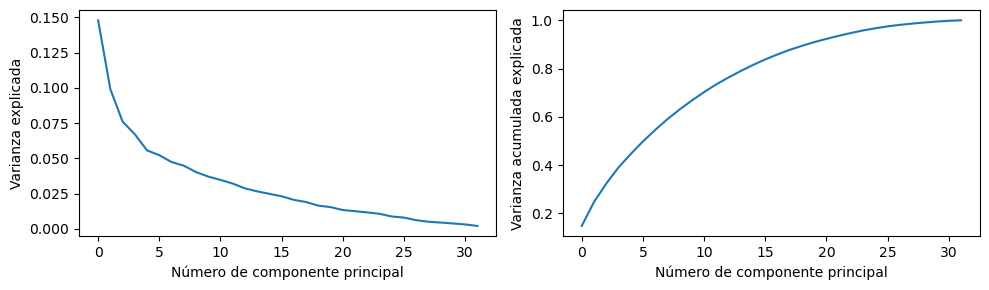

In [144]:
# Explained variance 
explained_variance = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance)

N = range(len(products))
plt.figure(figsize=(10, 3))

ax = plt.subplot(1, 2, 1)
plt.plot(N, explained_variance)
ax.set_xlabel('Número de componente principal')
ax.set_ylabel('Varianza explicada')

ax = plt.subplot(1, 2, 2)
plt.plot(N, cumulative_variance_ratio)
ax.set_xlabel('Número de componente principal')
ax.set_ylabel('Varianza acumulada explicada')

plt.tight_layout()
plt.show()

Se puede apreciar que con 4-5 componentes se puede explicar una parte bastante considerable de la varianza en los datos, más del 40%, lo cuál puede indicar una alta correlación en los precios de los productos. Para visualizar este comportamiento usemos un pairsplot con los 5 productos con scores más altos en la componente princial de PCA. Además si usamos diferentes marcas para diferenciar los clusters que hemos encontrado, vemos que los datos de una misma clase tienden a estar cerca unos de otros, lo cuál nos indica la correlación entre elementos del mismo clúster.

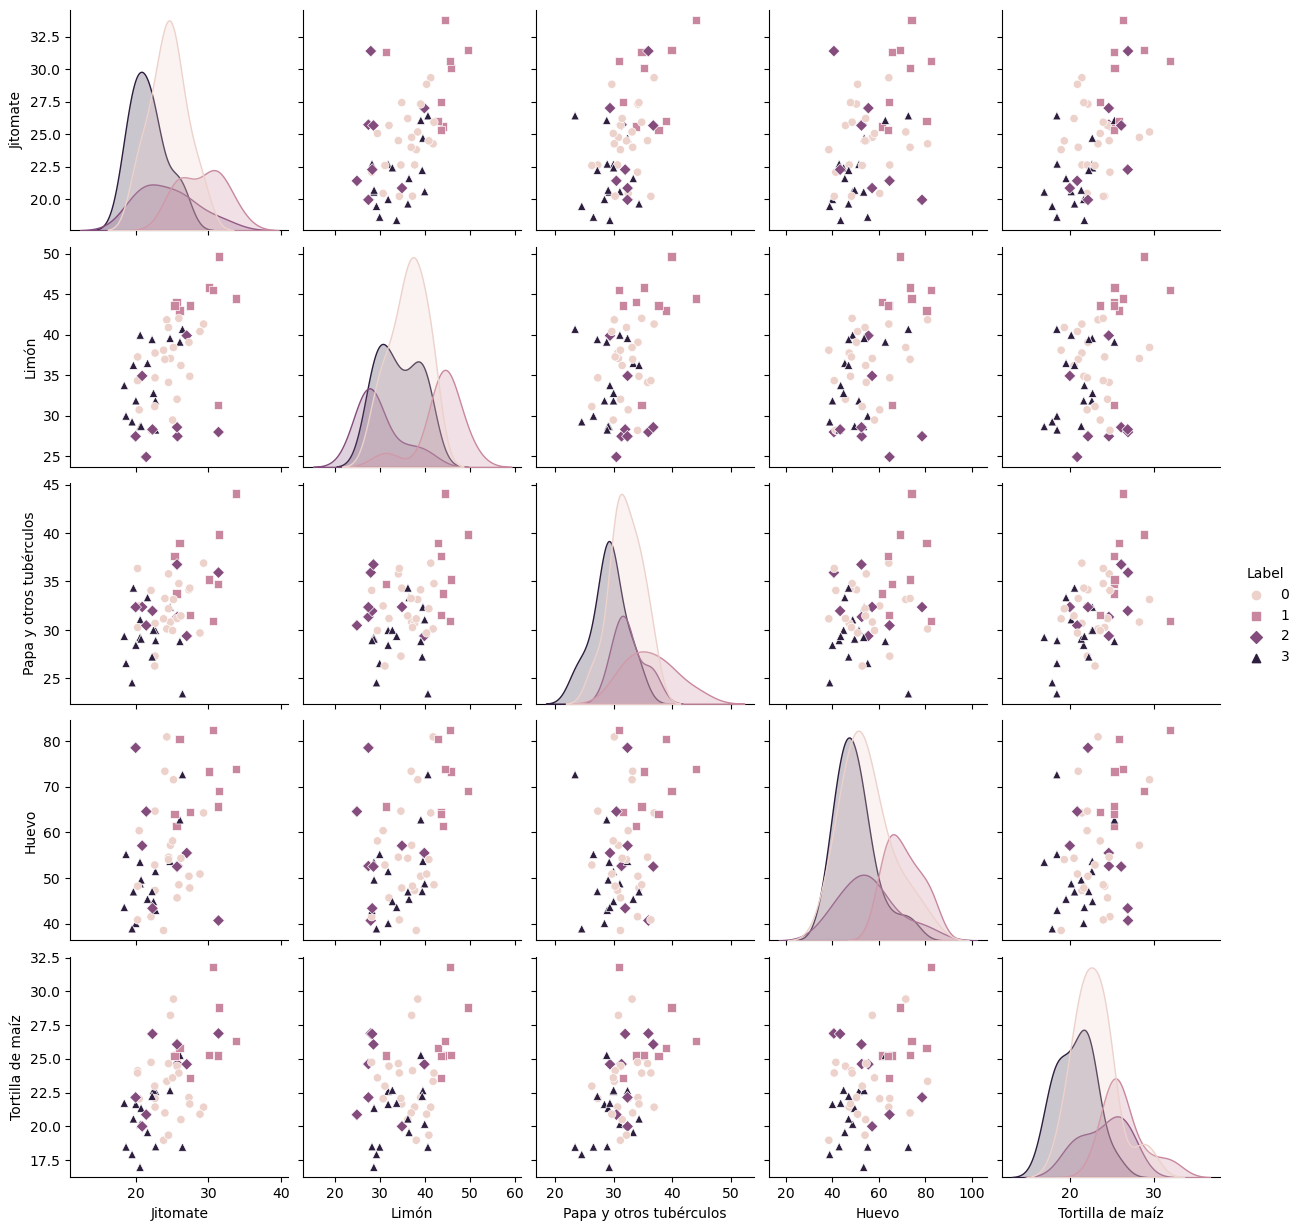

In [192]:
import warnings
# Suppress specific FutureWarnings regarding use_inf_as_na
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# Pairsplot 
top5_products = [product for product in list(top_products)[:5]]
top5_products.append('Label')
sns.pairplot(data_cities[top5_products], hue='Label', markers=["o", "s", "D", "^"])  
plt.show()

A continuación proyectemos los datos a dos y tres dimensiones para visualizarlos, con tres componentes se alcanza un 32.3% de varianza explicada. 

In [214]:
import plotly.express as px
from sklearn.decomposition import PCA

df_2Dpca = pd.DataFrame(data_cities_trans[:, 0:2], columns=['PCA-1', 'PCA-2'])
df_2Dpca['Nombre ciudad'] = cities
fig = px.scatter(df_2Dpca, x='PCA-1', y='PCA-2', color=data_cities['Label'], hover_data={'Nombre ciudad'}, 
                 color_continuous_scale='Viridis', range_color = (0, 4))

# Actualizar el diseño de la figura para que coincida con el estilo deseado
fig.update_layout(
    title=f'Visualización clustering de ciudades',
    xaxis_title='PCA-1',
    yaxis_title='PCA-2',
    legend_title='Etiqueta'
)
fig.show()

In [220]:
df_3Dpca = pd.DataFrame(data_cities_trans[:, 0:3], columns=['PCA-1', 'PCA-2', 'PCA-3'])
df_3Dpca['Nombre ciudad'] = cities

total_var = pca.explained_variance_ratio_[:3].sum() * 100

fig = px.scatter_3d(
    df_3Dpca, x='PCA-1', y='PCA-2', z='PCA-3', color=data_cities['Label'], hover_data={'Nombre ciudad'}, 
                color_continuous_scale='Viridis', range_color = (0, 4),
                    title=f'Total Explained Variance: {total_var:.2f}%'
)
fig.show()

## SOM

Ahora nos gustaría eencontrar grupos en los productos de la canasta básica para identificar cuales de ellos tiene un comportamiento similar en cuento a precios, pero esta vez utilizaremos el algoritmo conocido como Self Organizing Map, esto porque es un algorimo robusto ante datos atípicos. Además, como parte de las características de cada producto agregamos la desviación estándar de los precios mensuales, esto para tomar en cuenta cuanto varian los precios. 

In [17]:
std_column = [df[df['Genérico'] == product]['Precio promedio'].std() for product in products]
min_column = [df[df['Genérico'] == product]['Precio promedio'].min() for product in products]
max_column = [df[df['Genérico'] == product]['Precio promedio'].max() for product in products]

In [18]:
data_products = data_cities[products].copy().T
data_products.columns = cities
data_products.insert(0, 'std', std_column)
data_products.insert(0, 'min', min_column)
data_products.insert(0, 'max', max_column)
data_products.head()

,max,min,std,"Acapulco, Gro.","Aguascalientes, Ags.","Atlacomulco, Edo. de Méx.","Campeche, Camp.","Cancún, Q. Roo.","Cd. Acuña, Coah.","Cd. Juárez, Chih.",...,"Tijuana, B.C.","Tlaxcala, Tlax.","Toluca, Edo. de Méx.","Torreón, Coah.","Tulancingo, Hgo.","Tuxtla Gutiérrez, Chis.","Veracruz, Ver.","Villahermosa, Tab.","Zacatecas, Zac.",Área Met. de la Cd. de México
Aceites y grasas vegetales comestibles,585.95,33.33,74.303593,53.915667,110.513889,76.855972,101.768333,150.318056,55.326806,171.729792,...,82.656548,105.900357,134.203939,66.070833,75.532500,69.346528,71.973214,71.413452,98.115417,99.454583
Agua embotellada,92.00,0.49,8.760486,12.056806,9.079375,13.689667,16.280250,12.670000,15.005500,11.856833,...,12.517315,12.365379,16.815741,11.342333,10.614500,15.043810,12.120476,20.896771,15.846528,10.233429
Aguacate,146.88,10.00,17.238739,70.895000,53.861944,55.717361,61.004444,59.494500,56.900833,44.829792,...,72.404583,57.242045,60.062500,57.941875,55.756667,64.162000,51.174722,64.566667,60.302500,68.024921
Arroz,210.72,14.90,20.714297,24.314167,24.438667,24.408056,38.792024,55.739405,34.688667,32.449167,...,28.181833,27.417833,31.373690,26.626333,30.213750,34.061389,24.722500,42.917857,25.236944,31.316548
Atún y sardina en lata,625.00,15.00,49.734099,144.661833,139.889464,159.275667,119.225682,138.185278,123.262667,140.350625,...,144.255500,115.836310,136.976000,127.731979,99.252667,123.349667,126.865357,106.678095,124.072361,162.509653


Para decidir cuantas épocas dejaremos entrenar al modelo graficamos el error de cuantización el cuál es una métrica de que mide que tan diferentes son los elementos de un mismo clúster. 

In [19]:
# Scale data
scaler = StandardScaler()
data_products_scaled = scaler.fit_transform(data_products)
data_products_scaled = np.nan_to_num(data_products_scaled, nan=0)

# Instantiate a minisom blueprint
som = MiniSom(
    2, 2, data_products.shape[1],
    sigma=0.5, learning_rate=1,
    neighborhood_function='gaussian',
    random_seed=42
    )

# Decide number of batches 
np.random.seed(42)
num_iterations = 1000

q_errors = []
for i in range(1, num_iterations):
 som.train_batch(data_products_scaled, i)
 q_errors.append(som.quantization_error(data_products_scaled))

/Users/sergio/anaconda3/envs/machine_lr/lib/python3.9/site-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


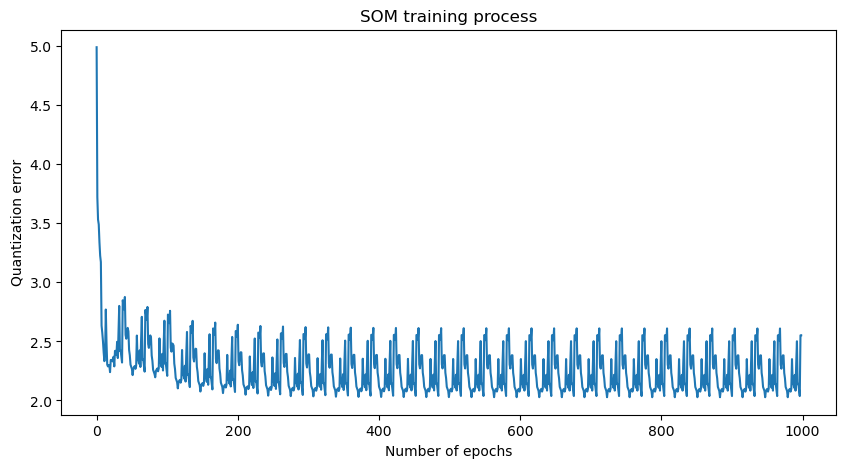

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(q_errors)
plt.ylabel('Quantization error')
plt.xlabel('Number of epochs')
plt.title('SOM training process')
plt.show()

Observando la gráfica, obtamos por entrenar a 400 épocas. 

In [21]:
som = MiniSom(
    2, 2, data_products.shape[1],
    sigma=0.5, learning_rate=1,
    neighborhood_function='gaussian',
    random_seed=42
    )
som.train(data_products_scaled, 400)

A continuación podemos ver la cantidad de puntos asociados a cada nodo, se ve un claro debalance en el número de elementos en cada grupo, esto nos indica la presencia de productos bastante diferentes al resto. 

In [22]:
data_products['winner_node'] = [som.winner(data_products_scaled[i]) for i in range(data_products.shape[0])]
data_products.groupby('winner_node').size().sort_values()

winner_node
(0, 0)     1
(0, 1)     1
(1, 1)     8
(1, 0)    22
dtype: int64

Una forma muy conveniente de visualizar la distancia promedio de un nodo a sus vecinos es con la matriz de distancias (U-Matrix), y de nuevo, podemos ver que uno de los nodos esta esencialmente muy separado del resto. 

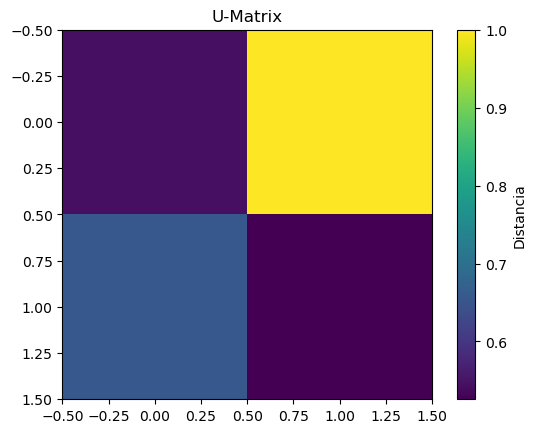

In [23]:
# Calcular la U-Matrix
u_matrix = som.distance_map()

# Visualizar la U-Matrix
plt.imshow(u_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Distancia')
plt.title('U-Matrix')
plt.show()

In [74]:
df_som_plot = pd.DataFrame([np.array(som.winner(d)) + np.random.rand(2) * 0.4 for d in data_products_scaled])
df_som_plot['Producto'] = products

# Creando el gráfico de calor
fig = go.Figure(data=go.Heatmap(
    z=som.distance_map().T,
    colorscale='Viridis',
    reversescale=True, 
    opacity=0.4  
))

# Añadiendo el scatter plot
fig.add_trace(go.Scatter(
    x=df_som_plot[0],
    y=df_som_plot[1],
    mode='markers',
    marker=dict(color='blue', size=10),  
    text=df_som_plot['Producto'], 
    hoverinfo='text' 
))

# Agregando la barra de color
fig.update_layout(
    title='SOM visualización',
    coloraxis_colorbar=dict(
        title="Distance"  
    ),
    width=700,  
    height=500,   
)
fig.show()

Como podemos ver en los nodos (0, 1), (0, 0) únicamente se encuentran el café soluble y crema y productos para higiene personal respectivamente, lo cuál deja en evidencia que ambos productos son muy diferentes en cuanto a precio a los demás, esto podría deberse principalmente en la variabilidad de precios que tienen estos dos productos. 